# ENCM 509 - Face Detection

In [1]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install lxml

Dataset from : https://www.kaggle.com/datasets/trainingdatapro/face-detection-photos-and-labels/data

In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os

csv_path = "data/face_detection.csv"
df = pd.read_csv(csv_path)

# Read the first 10 image paths
image_paths = df["image"][:10]
full_paths = [os.path.join("data", img_path) for img_path in image_paths]


In [ ]:
# Load and convert images to grayscale
grayscale_images = []
for full_path in full_paths:
    image = cv2.imread(full_path)
    if image is None:
        print(f"Error loading image: {full_path}")
        continue
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    grayscale_images.append(gray)

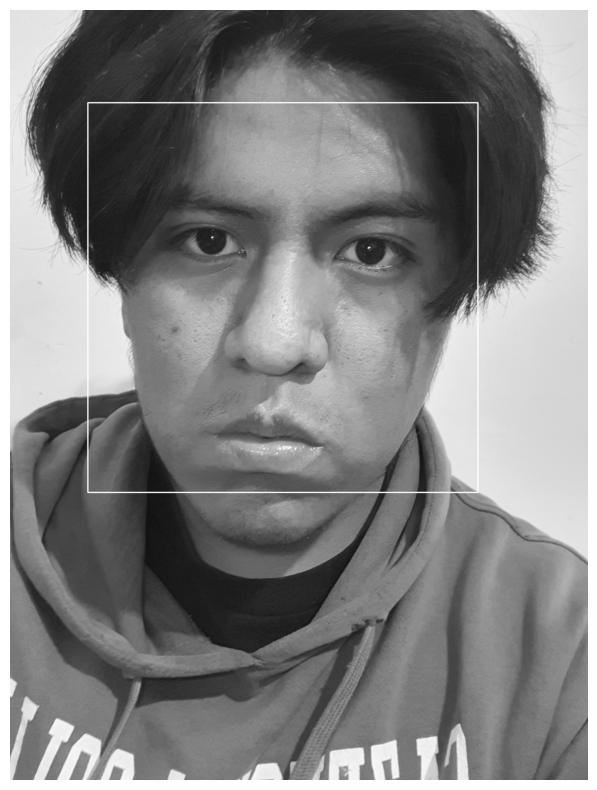

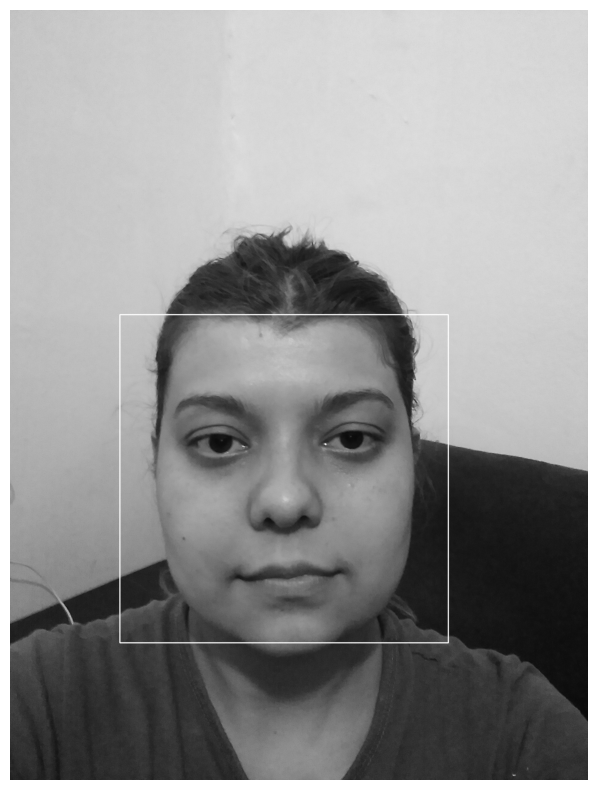

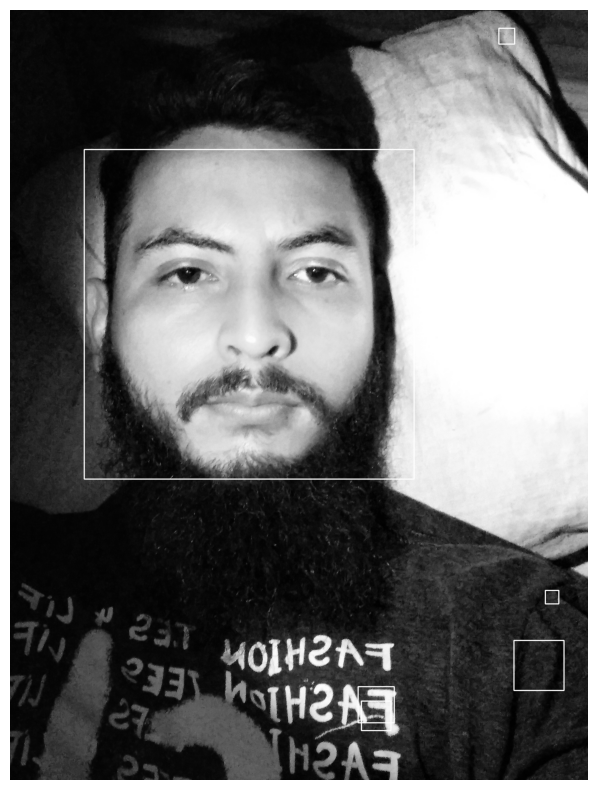

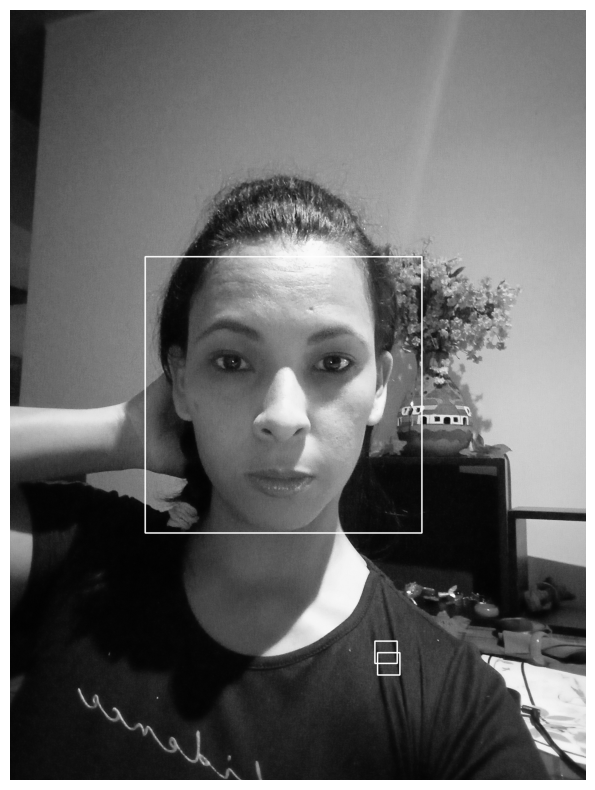

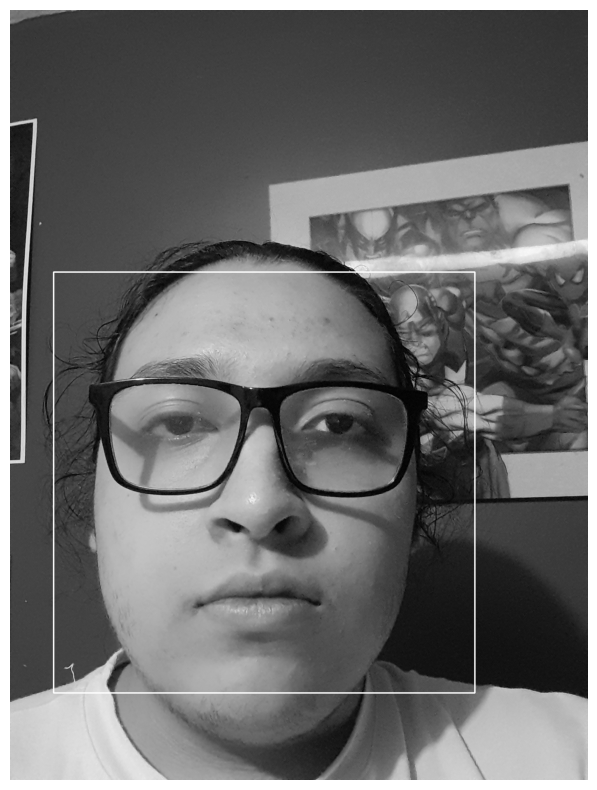

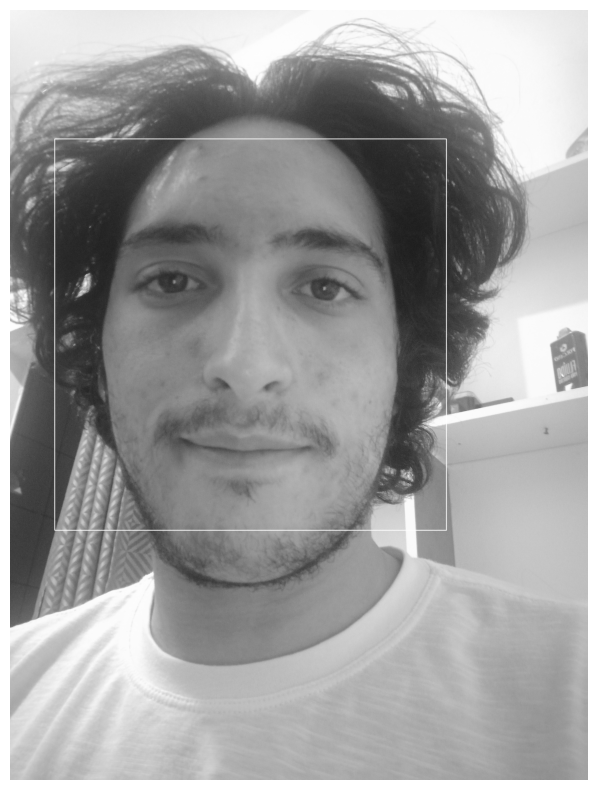

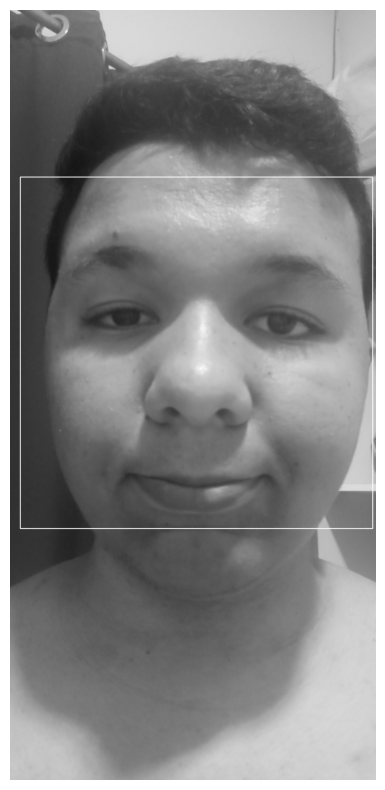

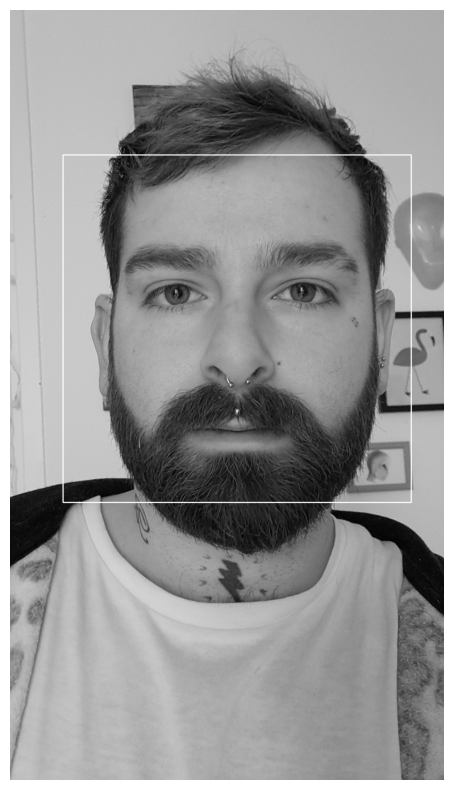

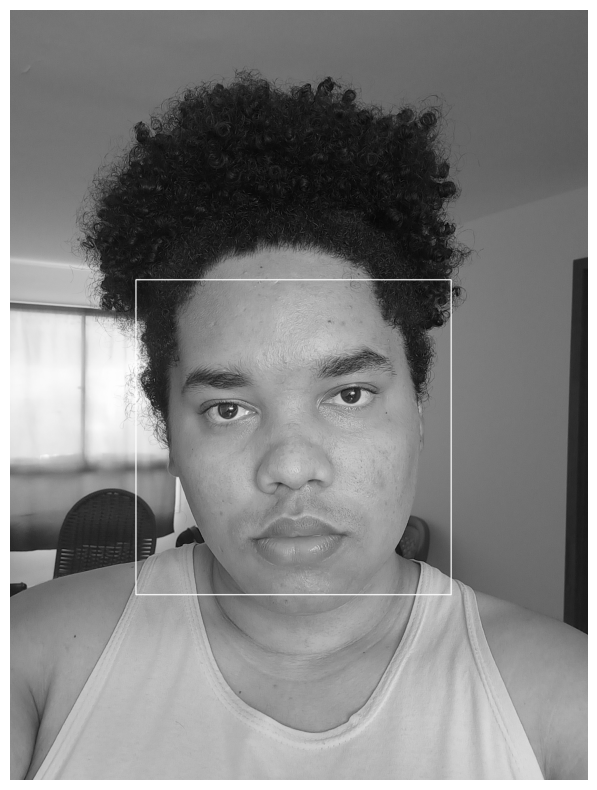

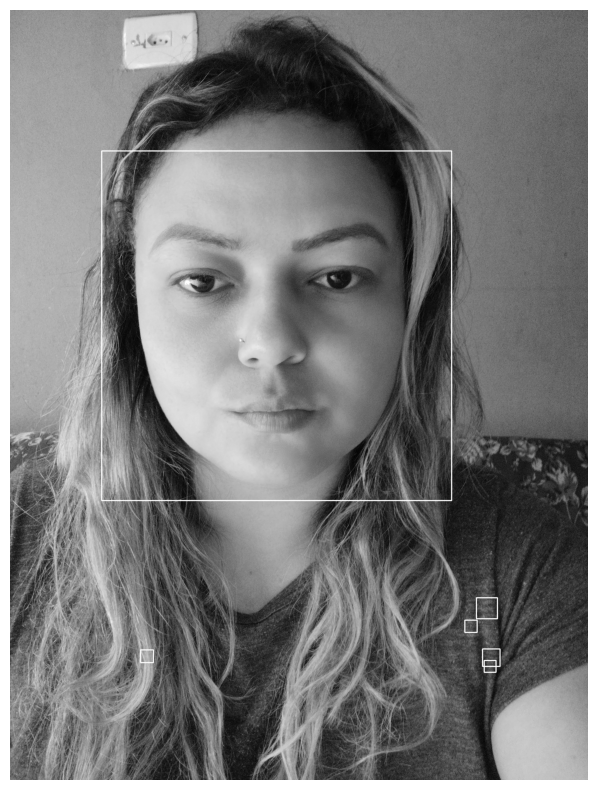

In [4]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

for image in grayscale_images:
    faces = face_classifier.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 4)
        img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20,10))
    plt.imshow(img_rgb)
    plt.axis('off')

In [6]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

xml_file = "data/annotations.xml"

tree = ET.parse(xml_file)
root = tree.getroot()

image_data = []

for image in root.findall("image"):
    img_name = image.get("name")
    width = int(image.get("width"))
    height = int(image.get("height"))
    
    for box in image.findall("box"):
        xtl = float(box.get("xtl"))
        ytl = float(box.get("ytl"))
        xbr = float(box.get("xbr"))
        ybr = float(box.get("ybr"))
        
        image_data.append({
            "name": img_name,
            "bbox": (xtl, ytl, xbr, ybr),
            "width": width,
            "height": height
        })

for img in image_data[:5]:
    print(img)


{'name': 'images/0.jpg', 'bbox': (446.28, 162.08, 1711.16, 2063.39), 'width': 2208, 'height': 2944}
{'name': 'images/1.jpg', 'bbox': (610.53, 1274.55, 1716.9, 2746.81), 'width': 2448, 'height': 3264}
{'name': 'images/10.jpg', 'bbox': (707.24, 955.5, 1642.69, 2453.6), 'width': 2448, 'height': 3264}
{'name': 'images/11.jpg', 'bbox': (274.9, 379.11, 1327.8, 2001.8), 'width': 1632, 'height': 3264}
{'name': 'images/12.jpg', 'bbox': (940.76, 785.4, 1980.36, 2306.17), 'width': 2448, 'height': 3264}
